<a href="https://colab.research.google.com/github/Tanuja2725/Machinelearning/blob/main/Walmart_predict_store_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                         
                          **Walmart predict store sales**


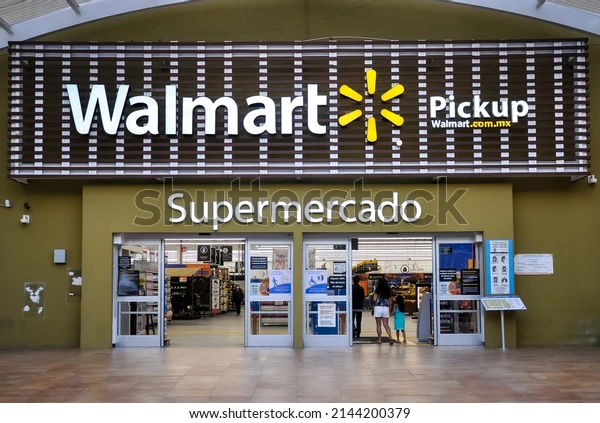

The objective is predicting store sales using historical markdown data.

You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.



Description:

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

Dataset Info:\ This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:\

*Store - the store number

*Date - the week of sales

*Weekly_Sales - sales for the given store

*Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

*Temperature - Temperature on the day of sale

*Fuel_Price - Cost of fuel in the region

*CPI – Prevailing consumer price index

*Unemployment - Prevailing unemployment rate

*Holiday Events\ Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\ Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\ Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\ Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

ACKNOWLEDGEMENTS

The dataset is taken from Kaggle.


OBJECTIVE:

@Understand the Dataset & cleanup (if required).

@Build Regression models to predict the sales w.r.t a single & multiple feature.

@Also evaluate the models & compare their respective scores like R2, RMSE, etc.

#Importing Libraries

In [ ]:

import pandas as pd
import numpy as np


#BoxCox transformations:

from sklearn.preprocessing import PowerTransformer     
from sklearn.preprocessing import QuantileTransformer

# Data preprocessing

# Scaling data in various manner
#import required libraries clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler


# Splitting data
from sklearn.model_selection import train_test_split                # Returns split data


# Pipelining
from sklearn.pipeline import make_pipeline

## Estimators:

# Modeling
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


#Performance metrics
from sklearn.metrics import  confusion_matrix,log_loss

import warnings
warnings.filterwarnings("ignore") # ignoring annoying warnings

#  Misc/visualization
import os, time, gc
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from matplotlib.gridspec import GridSpec


In [ ]:
# Display multiple commands output from a cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Mount gdrive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


#Reading Data

In [ ]:
# Set datafile path

path = "/gdrive/MyDrive/colab_data_ files/Excercise RFC/"
os.chdir(path)

In [ ]:
#  Read train file

WSD= pd.read_csv("Walmart Sales Dataset of 45stores.zip")


GETTING TO KNOW MORE ABOUT THE DATA

In [ ]:
#  Look at data

WSD.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
WSD

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
WSD.shape

(6435, 8)

In [ ]:
WSD.size

51480

In [ ]:
# Target classes--absolute vs normalized

WSD.value_counts()
print("\n\n--normalized--\n")
WSD.value_counts(normalize=True)

Store  Date        Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  CPI         Unemployment
1      01-04-2011  1495064.75    0             59.17        3.524       214.837166  7.682           1
30     30-09-2011  387001.13     0             78.91        3.355       216.362033  7.852           1
31     02-07-2010  1311704.92    0             82.29        2.669       210.880373  8.099           1
       02-04-2010  1357600.68    0             64.12        2.719       210.479887  8.200           1
       02-03-2012  1427881.22    0             59.30        3.630       220.486689  7.057           1
                                                                                                   ..
15     30-12-2011  603460.79     1             31.44        3.566       136.643258  7.866           1
       30-09-2011  521297.31     0             64.87        3.858       136.419500  7.806           1
       30-07-2010  619224.06     0             72.04        2.932       132.598387  8.0



--normalized--



Store  Date        Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  CPI         Unemployment
1      01-04-2011  1495064.75    0             59.17        3.524       214.837166  7.682           0.000155
30     30-09-2011  387001.13     0             78.91        3.355       216.362033  7.852           0.000155
31     02-07-2010  1311704.92    0             82.29        2.669       210.880373  8.099           0.000155
       02-04-2010  1357600.68    0             64.12        2.719       210.479887  8.200           0.000155
       02-03-2012  1427881.22    0             59.30        3.630       220.486689  7.057           0.000155
                                                                                                      ...   
15     30-12-2011  603460.79     1             31.44        3.566       136.643258  7.866           0.000155
       30-09-2011  521297.31     0             64.87        3.858       136.419500  7.806           0.000155
       30-07-2010  619224.06   

In [ ]:
#  Check if there are Missing/duplicate values? None

WSD.isnull().sum()            # None
print("\n----------")
WSD.isnull().sum().sum()      # None
print("\n------------")
WSD.duplicated().sum()        # None

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


----------


0


------------


0

In [ ]:
#  is  data skewed

WSD.describe()



,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
# FINDING UNIQUE VALUE FOR CATEGORIAL COLUMNS

for i in ['Store','Fuel_Price','Unemployment','Temperature','Weekly_Sales']:
    print(f'{i}: {WSD[i].nunique()}')

Store: 45
Fuel_Price: 892
Unemployment: 349
Temperature: 3528
Weekly_Sales: 6435


In [ ]:
# GETTING THE DATA TYPES+

WSD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
WSD.dtypes.value_counts()       

float64    5
int64      2
object     1
dtype: int64

In [ ]:
print("--Current memory usage (MB) --\n")
WSD.memory_usage().sum()


--Current memory usage (MB) --



411968

In [ ]:
print(f"Train data go from {WSD.Date.min()} to {WSD.Date.max()}")

Train data go from 01-04-2011 to 31-12-2010


# FEATURE ENGINEERING

In [ ]:
# There are no null values, therefore no cleaning will be done

# But the 'Date' column will be changed to datetime type

WSD['Date'] = pd.to_datetime(WSD['Date'], format=('%d-%m-%Y'))


In [ ]:
# Reduce sales column such that the figures can be easily displayed

WSD['Weekly_Sales'] = WSD['Weekly_Sales']/100000

In [ ]:
# I will create categories for the sales data
# All sales below 1,000,000 will be 'Low', those between 1,000,000 and 2,000,000 will be 'Moderate' and those 
# above 2,000,000 will be 'High'

WSD['category'] = np.where(WSD['Weekly_Sales']<10, 'Low', 
                          (np.where(WSD['Weekly_Sales']<=20, 'Moderate', 'High')))
WSD.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,category
0,1,2010-02-05,16.436909,0,42.31,2.572,211.096358,8.106,Moderate
1,1,2010-02-12,16.419574,1,38.51,2.548,211.242170,8.106,Moderate
2,1,2010-02-19,16.119682,0,39.93,2.514,211.289143,8.106,Moderate
3,1,2010-02-26,14.097276,0,46.63,2.561,211.319643,8.106,Moderate
4,1,2010-03-05,15.548067,0,46.50,2.625,211.350143,8.106,Moderate


In [ ]:
WSD

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,category
0,1,2010-02-05,16.436909,0,42.31,2.572,211.096358,8.106,Moderate
1,1,2010-02-12,16.419574,1,38.51,2.548,211.242170,8.106,Moderate
2,1,2010-02-19,16.119682,0,39.93,2.514,211.289143,8.106,Moderate
3,1,2010-02-26,14.097276,0,46.63,2.561,211.319643,8.106,Moderate
4,1,2010-03-05,15.548067,0,46.50,2.625,211.350143,8.106,Moderate
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,7.131739,0,64.88,3.997,192.013558,8.684,Low
6431,45,2012-10-05,7.334551,0,64.89,3.985,192.170412,8.667,Low
6432,45,2012-10-12,7.344644,0,54.47,4.000,192.327265,8.667,Low
6433,45,2012-10-19,7.181255,0,56.47,3.969,192.330854,8.667,Low


Correlation Between Features

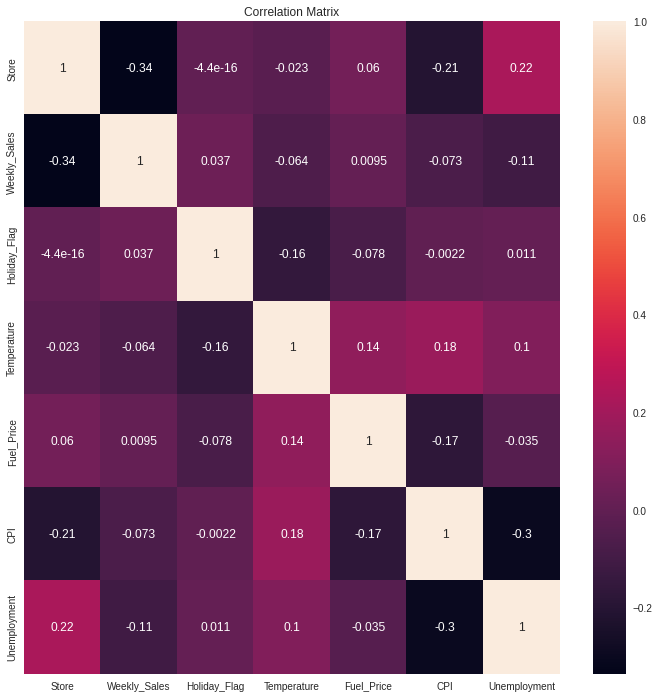

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(WSD.corr(),annot=True)
plt.title('Correlation Matrix');

# ENCODING STORE COLUMN

In [ ]:
pd.get_dummies(WSD['Store'],prefix='store')

,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,...,store_36,store_37,store_38,store_39,store_40,store_41,store_42,store_43,store_44,store_45
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
def onehot_encode(df , column ,prefix):
    df=df.copy()
    dummies = pd.get_dummies(df[column],prefix=prefix)
    df = pd.concat([df, dummies],axis=1)
    
    return df



In [ ]:
WSD = onehot_encode(WSD,column='Store', prefix='Store')

In [ ]:
WSD

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,category,Store_1,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1,2010-02-05,16.436909,0,42.31,2.572,211.096358,8.106,Moderate,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2010-02-12,16.419574,1,38.51,2.548,211.242170,8.106,Moderate,1,...,0,0,0,0,0,0,0,0,0,0
2,1,2010-02-19,16.119682,0,39.93,2.514,211.289143,8.106,Moderate,1,...,0,0,0,0,0,0,0,0,0,0
3,1,2010-02-26,14.097276,0,46.63,2.561,211.319643,8.106,Moderate,1,...,0,0,0,0,0,0,0,0,0,0
4,1,2010-03-05,15.548067,0,46.50,2.625,211.350143,8.106,Moderate,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,7.131739,0,64.88,3.997,192.013558,8.684,Low,0,...,0,0,0,0,0,0,0,0,0,1
6431,45,2012-10-05,7.334551,0,64.89,3.985,192.170412,8.667,Low,0,...,0,0,0,0,0,0,0,0,0,1
6432,45,2012-10-12,7.344644,0,54.47,4.000,192.327265,8.667,Low,0,...,0,0,0,0,0,0,0,0,0,1
6433,45,2012-10-19,7.181255,0,56.47,3.969,192.330854,8.667,Low,0,...,0,0,0,0,0,0,0,0,0,1


here some basic analysis 

1. Is unemployment increases sales decreases?

2. IS December is all time highest sales season?

3. Comparing Sales over years. Since oct 2012 real decline happend?

4. The store with Maximum Weekly Sales?

5. The Store with Weekly Sales varying a lot?

6. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together?




#EXPLORATORY DATA ANALYSIS(EDA)


In [ ]:
fig = px.histogram(WSD, x='Temperature', y ='Weekly_Sales', color='Holiday_Flag')#,color = "red")#, marginal='box')
fig.show()
# correlating the tempratue and weekly sales

NameError: ignored

In [ ]:
fig = px.histogram(WSD, x='Unemployment', y ='Weekly_Sales')#, color = "red" )--> should bename of columns only

fig.show()

In [ ]:
fig = px.histogram(WSD, x='Unemployment', y ='Weekly_Sales', marginal='box', title = 'How Unemployment affect sales', template='simple_white')
fig.show()



In [ ]:
sns.distplot(WSD['Weekly_Sales'],kde=True, color="g");#, ax=axes[0, 0])

In [ ]:
sns.displot(WSD['Temperature'],kde=True,color = 'r');#, ax=axes[1])
sns.displot(WSD['Fuel_Price'],kde=True ,color = 'blue');
sns.displot(WSD['Unemployment'],kde=False,color = 'purple');

#Checking Distribution of each Feature

In [ ]:
fig = plt.figure(figsize=(25,25));
ax = fig.gca()
WSD.hist(ax=ax)
plt.tight_layout;

#Separating Categorical and Numerical Features

In [ ]:
categorical_features = []
for col in WSD.columns:
    if(WSD[col].nunique()<30):
        categorical_features.append(col)

print(WSD[categorical_features].nunique().sort_values())

In [ ]:
numerical_features = list(set(WSD.columns) - set(categorical_features))
numerical_features

#Visualizing realtion between numerical features and Date

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(15,10));
imp=['Fuel_Price',
 'Temperature',
 'CPI',
 'Unemployment']
k=0
for i in range(2):
    for j in range(2):
        sns.histplot(ax=axes[i,j],x="Date",y=imp[k],data=WSD);
        k+=1

In [ ]:
WSD['Weekly_Sales'].plot(figsize=(15,5));

In [ ]:
def scatter(WSD, column):
    plt.figure()
    plt.scatter(WSD[column] , WSD['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

In [ ]:
scatter(WSD, 'Fuel_Price')
scatter(WSD, 'CPI')
scatter(WSD, 'Unemployment')
scatter(WSD, 'Temperature')


In [ ]:
sns.pairplot(WSD, vars=['Weekly_Sales', 'Fuel_Price', 'CPI', 'Temperature', 'Unemployment'])

In [ ]:
storeNames = WSD["Store"].unique()
storeCount = WSD["Store"].value_counts()

fig1, ax1 = plt.subplots(figsize=(10,10));
plt.pie(storeCount,
        labels=storeNames,
        startangle=90,
        shadow=True);
# Add title to graph
plt.title("Store Distribution");
# Draw the chart
plt.show();


In [ ]:
#the highest sale is
SALE=WSD.groupby(WSD['Date']).aggregate({'Weekly_Sales': 'std'}).reset_index().sort_values(by = 'Weekly_Sales',ascending=False)
SALE.head()

              here dec.24.2010 is the highest sale

In [ ]:
fig, ax = plt.subplots(figsize=(18,8));
sns.histplot(data=WSD, x="Weekly_Sales", hue="Holiday_Flag", kde=True);
plt.show()

                    Weekly Sales with respect to Holidays effected mostly

In [ ]:
tmp = WSD.groupby(['Store'], as_index=False).agg(Sum_of_Weekly_Sales=('Weekly_Sales','sum'))
tmp[(tmp['Sum_of_Weekly_Sales'] == max(tmp['Sum_of_Weekly_Sales']))]
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=tmp, x="Store", y="Sum_of_Weekly_Sales")
plt.show()

                     Store with Max Weekly Sales

In [ ]:
def make_discrete_plot(feature):
    fig = plt.figure(figsize=(20,8))
    gs = GridSpec(1,2)
    sns.boxplot(y=WSD.Weekly_Sales, x=WSD[feature], ax=fig.add_subplot(gs[0,0]))
    plt.ylabel('Sales', fontsize=16)
    plt.xlabel(feature, fontsize=16)
    sns.stripplot(y=WSD.Weekly_Sales, x=WSD[feature], ax=fig.add_subplot(gs[0,1]))
    plt.ylabel('Sales', fontsize=16)
    plt.xlabel(feature, fontsize=16)
    fig.show()

make_discrete_plot('Holiday_Flag') 

         This field is going to be important to differentiate Week Holidays. As we can see, Week Holidays have more high sales events than non-Holiday Weeks.

In [ ]:
sales_year = WSD.groupby(['Date']).sum()
sales_year[['Weekly_Sales']].plot(figsize=(16, 6), subplots=True);

           sales effected in every year

In [ ]:
weekly_sales_mean = WSD['Weekly_Sales'].groupby(WSD['Date']).mean()
weekly_sales_median = WSD['Weekly_Sales'].groupby(WSD['Date']).median()
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_mean.index, weekly_sales_mean.values)
sns.lineplot(weekly_sales_median.index, weekly_sales_median.values)
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Weekly Sales - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

             Just as an observation, the mean and the median are very different, suggesting that some stores/departments might sell much more than others.

In [ ]:
# Overall sales

fig, ax = plt.subplots(figsize=(8,4));
sns.violinplot(data=WSD, x='category', y='Weekly_Sales');
plt.xlabel('Sales Category')
plt.ylabel('Weekly Sales in USD (x100,000)')
plt.show()

                   

- In the low category, majority of the weekly sales are USD 500,000
- In the moderate category, majority of the weekly sales are USD 1,400,000
- In the high category, majority of the weekly sales are USD 2,200,000

In [ ]:
# Display stats of sales at each store

fig, ax = plt.subplots(figsize=(13,8))
sns.stripplot(data=WSD, x='Store', y='Weekly_Sales', hue='category');
plt.xlabel('Store Number')
plt.ylabel('Weekly Sales in USD (x100,000)')
plt.show()

1. The sales performance of some stores changes from one level to the other. These were;
a. From low to moderate. These were store number 7, 8, 12, 15, 16, 17, 18, 21, 22, 25, 26, 29, 32, 34, 35, 40, 45
b. From moderate to high. These were store number 1, 4, 6, 10, 11,13, 14, 18, 20, 23, 24, 27, 28, 31, 39, 41
2. Some stores had persistently low weekly sales. These were store number 3, 5, 30, 33, 36, 37, 38, 42, 43, 44. By contrast, there were no stores with only moderate or only high weekly sales.
3. The sales of store 18 transitioned through all the 3 sales categories

##value distribution

In [ ]:
WSD.plot(subplots=True, grid=True, figsize=(30,40));

##Variables Correlation

In [ ]:
sns.set(style="white")

corr = WSD.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(60, 40))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()


In [ ]:
#we are not considering the correlations between X features among themselves

corr = WSD.corr();
corr = corr.Weekly_Sales;
cr = corr.sort_values(ascending = False)[2:];
sns.barplot(x=cr, y=cr.index,palette = "bright");
plt.title("Correlation between sales");


       Although skewness changes, correlation doesn't seem to change at all. We can decide to drop it.

In [ ]:
#here we have add the date column to feature importance
WSD['day'] = WSD.Date.dt.day
WSD['Week'] = WSD.Date.dt.week 
WSD['Year'] = WSD.Date.dt.year


In [ ]:
WSD

# PREDICTION and REGRESSION

creating clustering

In [ ]:
X_train = WSD[['Holiday_Flag','day','Week','Year','Fuel_Price']]
Y_train = WSD['Weekly_Sales']

##Apply standard scalar

In [ ]:
# Instantiate Scaler class
ss = StandardScaler()

#Train scaler object
ss.fit(X_train)

#
X_train = ss.transform(X_train)



StandardScaler()

In [ ]:
WSD_scaled = ss.transform(X_train)
WSD_scaled

array([[-1.34939222e+00, -1.93007406e+00, -1.93173216e+00,
        -2.52482248e+03, -1.10513795e+01],
       [ 1.40257958e+01, -1.83875196e+00, -1.92672222e+00,
        -2.52482248e+03, -1.11653037e+01],
       [-1.34939222e+00, -1.74742987e+00, -1.92171228e+00,
        -2.52482248e+03, -1.13266964e+01],
       ...,
       [-1.34939222e+00, -1.83875196e+00, -1.75137442e+00,
        -2.52167357e+03, -4.27288828e+00],
       [-1.34939222e+00, -1.74742987e+00, -1.74636448e+00,
        -2.52167357e+03, -4.42004040e+00],
       [-1.34939222e+00, -1.65610777e+00, -1.74135455e+00,
        -2.52167357e+03, -4.83301570e+00]])

In [ ]:
#kmeans class instantiate
#object created TO kmeans

kmeans = KMeans(n_clusters=3, max_iter=100)

kmeans.fit(WSD_scaled)
print("\n--")
kmeans.cluster_centers_
print("\n--")
kmeans.labels_
print("\n--")
kmeans.inertia_
print("\n--")
kmeans.n_iter_
print("\n---")
kmeans.n_features_in_
kmeans.labels_
kmeans.inertia_

KMeans(max_iter=100, n_clusters=3)


--


array([[-1.34939222e+00, -1.79456549e+00, -1.82697735e+00,
        -2.52457863e+03, -9.68145466e+00],
       [ 1.40257958e+01, -1.77221729e+00, -1.79445988e+00,
        -2.52356292e+03, -7.93999296e+00],
       [-1.34939222e+00, -1.79063789e+00, -1.83176977e+00,
        -2.52246488e+03, -5.74676284e+00]])


--


array([0, 1, 0, ..., 2, 2, 2], dtype=int32)


--


12239.277394530302


--


5


---


5

array([0, 1, 0, ..., 2, 2, 2], dtype=int32)

12239.277394530302

In [ ]:
#silhoutte score
#empty list
sse = []
s_score = []
scm= KMeans(n_clusters = 4,max_iter = 100)
   
# 'train' the instantiated object

scm.fit(WSD_scaled)

#  Calculate inertia and append it to sse

sse.append(scm.inertia_)   

# silhouette_score

sc=silhouette_score(WSD_scaled, scm.labels_, sample_size=1000)
s_score.append(sc)

sse

KMeans(max_iter=100, n_clusters=4)

[8516.894351121628]

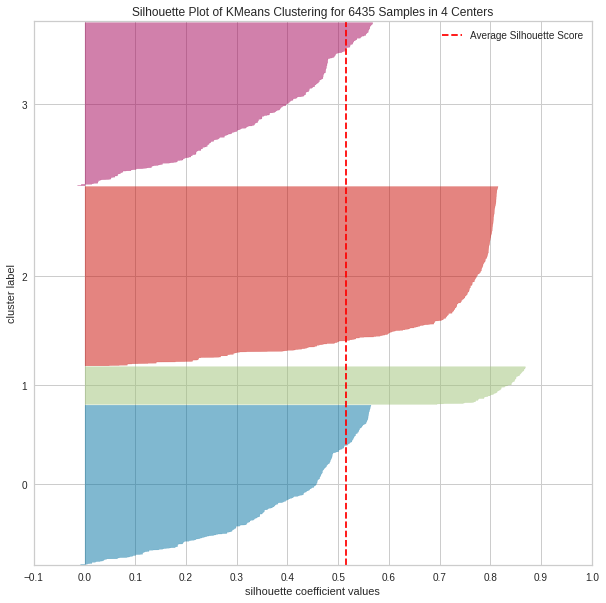

In [ ]:
#silhoutte plotting

visualizer = SilhouetteVisualizer( scm,
                                  colors='yellowbrick')
fig = plt.figure(figsize= (10,10))
_= visualizer.fit(WSD_scaled);    
_= visualizer.show()      

#Modeling and training

#Random Forest Regressor

MODEL FUNCTIONS:

In [ ]:
def WMAE(dataset, real, predicted):
    weights = dataset.Holiday_Flag.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

The functions for Random Forest, Parameters Tuning and Cross Validation are:

In [ ]:
def random_forest(n_estimators, max_depth):
    result = []
    for estimator in n_estimators:
        for depth in max_depth:
            wmaes_cv = []
            for i in range(1,5):
                print('k:', i, ', n_estimators:', estimator, ', max_depth:', depth)
                x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)
                RF = RandomForestRegressor(n_estimators=estimator, max_depth=depth)
                RF.fit(x_train, y_train)
                predicted = RF.predict(x_test)
                wmaes_cv.append(WMAE(x_test, y_test, predicted))
            print('WMAE:', np.mean(wmaes_cv))
            result.append({'Max_Depth': depth, 'Estimators': estimator, 'WMAE': np.mean(wmaes_cv)})
    return pd.DataFrame(result)

In [ ]:
def random_forest_II(n_estimators, max_depth, max_features):
    result = []
    for feature in max_features:
        wmaes_cv = []
        for i in range(1,5):
            print('k:', i, ', max_features:', feature)
            x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)
            RF = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=feature)
            RF.fit(x_train, y_train)
            predicted = RF.predict(x_test)
            wmaes_cv.append(WMAE(x_test, y_test, predicted))
        print('WMAE:', np.mean(wmaes_cv))
        result.append({'Max_Feature': feature, 'WMAE': np.mean(wmaes_cv)})
        return pd.DataFrame(result)

In [ ]:
def random_forest_III(n_estimators, max_depth, max_features, min_samples_split, min_samples_leaf):
    result = []
    for split in min_samples_split:
        for leaf in min_samples_leaf:
            wmaes_cv = []
            for i in range(1,5):
                print('k:', i, ', min_samples_split:', split, ', min_samples_leaf:', leaf)
                x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)
                RF = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, 
                                           min_samples_leaf=leaf, min_samples_split=split)
                RF.fit(x_train, y_train)
                predicted = RF.predict(x_test)
                wmaes_cv.append(WMAE(x_test, y_test, predicted))
            print('WMAE:', np.mean(wmaes_cv))
            result.append({'Min_Samples_Leaf': leaf, 'Min_Samples_Split': split, 'WMAE': np.mean(wmaes_cv)})
    return pd.DataFrame(result)


In [ ]:
n_estimators = [56, 58, 60]
max_depth = [25, 27, 30]

random_forest(n_estimators, max_depth)

k: 1 , n_estimators: 56 , max_depth: 25
k: 2 , n_estimators: 56 , max_depth: 25
k: 3 , n_estimators: 56 , max_depth: 25
k: 4 , n_estimators: 56 , max_depth: 25
WMAE: 5.5925
k: 1 , n_estimators: 56 , max_depth: 27
k: 2 , n_estimators: 56 , max_depth: 27
k: 3 , n_estimators: 56 , max_depth: 27
k: 4 , n_estimators: 56 , max_depth: 27
WMAE: 5.6475
k: 1 , n_estimators: 56 , max_depth: 30
k: 2 , n_estimators: 56 , max_depth: 30
k: 3 , n_estimators: 56 , max_depth: 30
k: 4 , n_estimators: 56 , max_depth: 30
WMAE: 5.717500000000001
k: 1 , n_estimators: 58 , max_depth: 25
k: 2 , n_estimators: 58 , max_depth: 25
k: 3 , n_estimators: 58 , max_depth: 25
k: 4 , n_estimators: 58 , max_depth: 25
WMAE: 5.6049999999999995
k: 1 , n_estimators: 58 , max_depth: 27
k: 2 , n_estimators: 58 , max_depth: 27
k: 3 , n_estimators: 58 , max_depth: 27
k: 4 , n_estimators: 58 , max_depth: 27
WMAE: 5.5375
k: 1 , n_estimators: 58 , max_depth: 30
k: 2 , n_estimators: 58 , max_depth: 30
k: 3 , n_estimators: 58 , max_de

,Max_Depth,Estimators,WMAE
0,25,56,5.5925
1,27,56,5.6475
2,30,56,5.7175
3,25,58,5.6050
4,27,58,5.5375
5,30,58,5.5350
6,25,60,5.6275
7,27,60,5.6225
8,30,60,5.6350


      The result by the time I run it is 58 and 27

Tuning Max_features:

In [ ]:
max_features = [2, 3, 4, 5, 6, 7]

random_forest_II(n_estimators=58, max_depth=27, max_features=max_features)

k: 1 , max_features: 2
k: 2 , max_features: 2
k: 3 , max_features: 2
k: 4 , max_features: 2
WMAE: 5.5649999999999995


,Max_Feature,WMAE
0,2,5.565


Tuning 'min_samples_split' and 'min_samples_leaf'.

In [ ]:
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2, 3]

random_forest_III(n_estimators=58, max_depth=27, max_features=4, 
                  min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

k: 1 , min_samples_split: 2 , min_samples_leaf: 1
k: 2 , min_samples_split: 2 , min_samples_leaf: 1
k: 3 , min_samples_split: 2 , min_samples_leaf: 1
k: 4 , min_samples_split: 2 , min_samples_leaf: 1
WMAE: 5.695
k: 1 , min_samples_split: 2 , min_samples_leaf: 2
k: 2 , min_samples_split: 2 , min_samples_leaf: 2
k: 3 , min_samples_split: 2 , min_samples_leaf: 2
k: 4 , min_samples_split: 2 , min_samples_leaf: 2
WMAE: 5.3975
k: 1 , min_samples_split: 2 , min_samples_leaf: 3
k: 2 , min_samples_split: 2 , min_samples_leaf: 3
k: 3 , min_samples_split: 2 , min_samples_leaf: 3
k: 4 , min_samples_split: 2 , min_samples_leaf: 3
WMAE: 5.195
k: 1 , min_samples_split: 3 , min_samples_leaf: 1
k: 2 , min_samples_split: 3 , min_samples_leaf: 1
k: 3 , min_samples_split: 3 , min_samples_leaf: 1
k: 4 , min_samples_split: 3 , min_samples_leaf: 1
WMAE: 5.575
k: 1 , min_samples_split: 3 , min_samples_leaf: 2
k: 2 , min_samples_split: 3 , min_samples_leaf: 2
k: 3 , min_samples_split: 3 , min_samples_leaf: 2
k

,Min_Samples_Leaf,Min_Samples_Split,WMAE
0,1,2,5.6950
1,2,2,5.3975
2,3,2,5.1950
3,1,3,5.5750
4,2,3,5.4350
5,3,3,5.2400
6,1,4,5.6000
7,2,4,5.4575
8,3,4,5.2475


      The result by the time I run it is 3 and 1.

##FINAL MODEL

In [ ]:
RF = RandomForestRegressor(n_estimators=58, max_depth=27, max_features=5, min_samples_split=3, min_samples_leaf=1)

RF.fit(X_train, Y_train)

RandomForestRegressor(max_depth=27, max_features=5, min_samples_split=3,
                      n_estimators=58)

In [ ]:
X_test = WSD[['Holiday_Flag','Week', 'Year','CPI','Store']]
predict = RF.predict(X_test)

In [ ]:
y_test


array([ 8.57657047,  8.6137992 ,  8.52063624, ..., 12.35943198,
       12.35943198, 12.35943198])

In [ ]:
len(X_test)

6435

In [ ]:
RF.score(X_test,predict)

1.0

In [ ]:
y_predict=RF.predict(X_test)

In [ ]:
# feature_importance of RFR
regimp = pd.Series(RF.feature_importances_,
                        index = X_train.columns).sort_values(ascending=False)
regimp*100

Fuel_Price      60.020180
Week            21.182128
day             15.313747
Year             2.663280
Holiday_Flag     0.820666
dtype: float64

## Mean Square Error

In [ ]:
#
train_output = []
test_output = []
list_nb_trees = [5, 10, 15, 30, 45, 60, 80, 100]


for nb_trees in list_nb_trees:
    RF= RandomForestRegressor(n_estimators=nb_trees)
    RF.fit(X_train, np.ravel(Y_train))

    train_output.append(mean_squared_error(Y_train, RF.predict(X_train)))
    test_output.append(mean_squared_error(y_test, RF.predict(X_test)))

RandomForestRegressor(n_estimators=5)

RandomForestRegressor(n_estimators=10)

RandomForestRegressor(n_estimators=15)

RandomForestRegressor(n_estimators=30)

RandomForestRegressor(n_estimators=45)

RandomForestRegressor(n_estimators=60)

RandomForestRegressor(n_estimators=80)

RandomForestRegressor()

#calculate Means Square Error


(<Figure size 864x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fab14ef2e90>)

Text(0.5, 1.0, 'MSE and Training and Testing Score score')

Text(0, 0.5, 'MSE')

Text(0.5, 0, 'n_estimators')

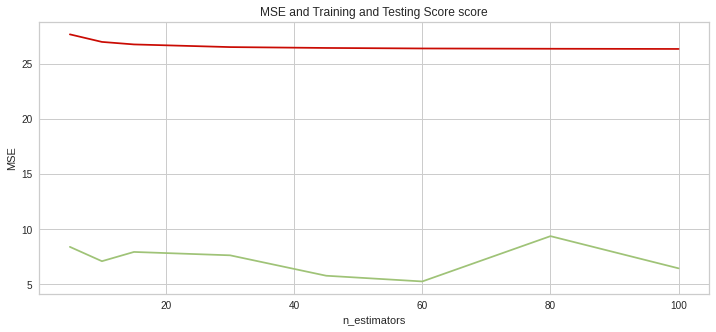

In [ ]:
#Displaying the MSE error ploting of testing train data

plt.subplots(figsize=(12,5))
plt.plot(list_nb_trees, train_output, color="r", linestyle='-', label="Training Score");
plt.plot(list_nb_trees, test_output, color="g", linestyle='-', label="Testing Score");
plt.title("MSE and Training and Testing Score score")
plt.ylabel('MSE')
plt.xlabel('n_estimators')
plt.show()

Text(0.5, 0, 'X-Variable Scores')

Text(0, 0.5, 'Y-Variables')

Text(0.5, 1.0, 'Feature Importance')

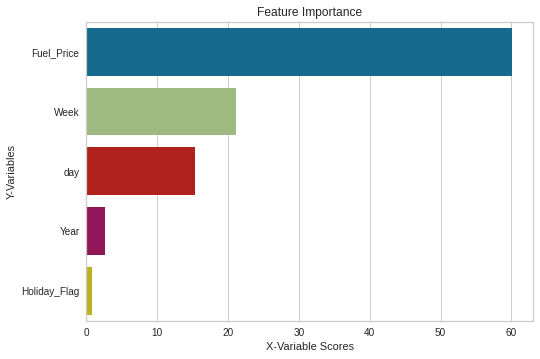

In [ ]:
#Displaying the feature importances in plot
sns.barplot(x= regimp*100, y = regimp.index)
plt.xlabel("X-Variable Scores")
plt.ylabel("Y-Variables")
plt.title("Feature Importance")
plt.show()

In [ ]:
Final = X_test[['Store', 'CPI', 'Week']]
Final['Weekly_Sales'] = predict

In [ ]:
Final_adj = pysqldf("""
    SELECT
        Store,
        CPI,
        Week,
        Weekly_Sales,
        case 
            when Week = 52 and last_sales > 2*Weekly_Sales then Weekly_Sales+(2.5/7)*last_sales
            else Weekly_Sales 
        end as Weekly_Sales_Adjusted
    from(
        SELECT
            Store, 
            CPI, 
            Week, 
            Weekly_Sales,
            case 
                when Week = 52 then lag(Weekly_Sales) over(partition by Store, Dept) 
            end as last_sales
        from Final)""")


NameError: ignored